In [2]:
pip install ucimlrepo

In [3]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

# Task
Inspect and clean the `bank_marketing` dataset by checking its structure, data types, and handling missing or 'unknown' values. Then, combine the features and target variables, and perform exploratory data analysis using visualizations to understand the distributions of key features and their relationships with the target variable 'y'.

## Data Overview and Inspection

### Subtask:
Inspect the `X` and `y` DataFrames to understand their structure, data types, and check for missing values or 'unknown' entries in categorical features. This step includes checking for unique values and basic descriptive statistics.


**Reasoning**:
To begin the data overview and inspection, I will display the first few rows of both `X` and `y` DataFrames, then print their concise summaries (info), generate descriptive statistics for `X`, check for missing values in both, and finally, identify unique values in categorical columns of `X` and unique values and their counts for `y`.



In [4]:
print("### First 5 rows of X DataFrame:\n")
print(X.head())
print("\n### First 5 rows of y DataFrame:\n")
print(y.head())

print("\n### Info for X DataFrame:\n")
X.info()
print("\n### Info for y DataFrame:\n")
y.info()

print("\n### Descriptive statistics for X DataFrame (numerical columns):\n")
print(X.describe())

print("\n### Missing values in X DataFrame:\n")
print(X.isnull().sum())

print("\n### Unique values for categorical columns in X DataFrame:\n")
for col in X.select_dtypes(include='object').columns:
    print(f"\nUnique values for column '{col}':\n{X[col].unique()}")

print("\n### Missing values in y DataFrame:\n")
print(y.isnull().sum())

print("\n### Unique values and their counts for y DataFrame:\n")
print(y['y'].value_counts())


### First 5 rows of X DataFrame:

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  

### First 5 rows of y DataFrame:

    y
0  no
1  no
2  no


## Data Cleaning and Preparation

### Subtask:
Address missing values (NaN) and 'unknown' values in categorical columns. This might involve imputation, removal, or re-categorization based on the insights from the inspection. Combine `X` and `y` into a single DataFrame for easier analysis and visualization.


**Reasoning**:
To address missing values, I will replace 'NaN' with 'unknown' in the specified categorical columns of the 'X' DataFrame, and then combine the 'X' and 'y' DataFrames into a single DataFrame named 'df' for further analysis.



In [7]:
for col in ['job', 'education', 'contact', 'poutcome']:
    X[col] = X[col].fillna('unknown')

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

print("### Missing values in X DataFrame after handling NaNs:")
print(X[['job', 'education', 'contact', 'poutcome']].isnull().sum())
print("\n### First 5 rows of combined DataFrame (df):")
print(df.head())
print("\n### Info for combined DataFrame (df):")
df.info()

### Missing values in X DataFrame after handling NaNs:
job          0
education    0
contact      0
poutcome     0
dtype: int64

### First 5 rows of combined DataFrame (df):
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
0  unknown            5   may       261         1     -1         0  unknown   
1  unknown            5   may       151         1     -1         0  unknown   
2  unknown            5   may        76         1     -1         0  unknown   
3  unknown            5   may        92         1     -1         

/tmp/ipython-input-166597870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna('unknown')


**Reasoning**:
The previous code failed because the `pandas` library was not imported, causing a `NameError: name 'pd' is not defined`. I will add the import statement for `pandas` and also address the `SettingWithCopyWarning` by using `.loc` for modifying the DataFrame to ensure the operations are performed directly on the original `X` DataFrame.



In [6]:
import pandas as pd

for col in ['job', 'education', 'contact', 'poutcome']:
    X.loc[:, col] = X[col].fillna('unknown')

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

print("### Missing values in X DataFrame after handling NaNs:")
print(X[['job', 'education', 'contact', 'poutcome']].isnull().sum())
print("\n### First 5 rows of combined DataFrame (df):")
print(df.head())
print("\n### Info for combined DataFrame (df):")
df.info()

### Missing values in X DataFrame after handling NaNs:
job          0
education    0
contact      0
poutcome     0
dtype: int64

### First 5 rows of combined DataFrame (df):
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
0  unknown            5   may       261         1     -1         0  unknown   
1  unknown            5   may       151         1     -1         0  unknown   
2  unknown            5   may        76         1     -1         0  unknown   
3  unknown            5   may        92         1     -1         

## Exploratory Data Analysis and Visualization

### Subtask:
Perform exploratory data analysis to understand the distributions of key features and their relationships with the target variable 'y'. Generate various plots, such as bar charts for categorical features, histograms for numerical features, and cross-tabulations or stacked bar charts to visualize feature impact on the 'y' (subscription) outcome.


## Summary:

### Data Analysis Key Findings

*   The `X` DataFrame contains 45,211 entries across 16 columns, comprising 7 numerical and 9 categorical features.
*   Significant missing values were identified in `X`: `poutcome` (approximately 81.7%, or 36,959 entries), `contact` (approximately 28.8%, or 13,020 entries), `education` (approximately 4.1%, or 1,857 entries), and `job` (approximately 0.6%, or 288 entries). These `NaN` values were present within the categorical columns.
*   The `y` DataFrame, containing the target variable, has 45,211 entries with no missing values.
*   The target variable `y` is highly imbalanced, with 'no' responses totaling 39,922 instances and 'yes' responses totaling 5,289 instances.
*   After cleaning, `NaN` values in the 'job', 'education', 'contact', and 'poutcome' columns of the `X` DataFrame were successfully replaced with the string 'unknown'.
*   The `X` and `y` DataFrames were successfully combined into a single DataFrame `df`, which now has 17 columns and 45,211 entries, with no remaining missing values in the treated columns.

### Insights or Next Steps

*   The substantial class imbalance in the target variable ('no' vs. 'yes' subscriptions) requires careful consideration during model training to prevent biased predictions, potentially through techniques like oversampling, undersampling, or using appropriate evaluation metrics.
*   Proceed with detailed exploratory data analysis and visualization on the combined `df` to understand feature distributions and their relationships with the target variable, leveraging the 'unknown' category for previously missing values.


# Task
Perform exploratory data analysis on the `df` DataFrame by visualizing the distributions of its features and their relationships with the target variable 'y' (term deposit subscription outcome). This includes creating bar charts for categorical features, histograms for numerical features, and using stacked bar charts or grouped bar charts for categorical features and box plots or violin plots for numerical features to show their impact on the 'y' variable.

## Distribution of Categorical Features

### Subtask:
Create bar charts for each categorical feature in 'df' to display their distribution, highlighting how each category relates to the 'y' target variable (subscription outcome).


**Reasoning**:
To visualize the distribution of categorical features and their relationship with the target variable 'y', I will import the necessary plotting libraries, identify categorical columns, and then iterate through them to create bar charts using seaborn's countplot function, showing the breakdown by subscription outcome.



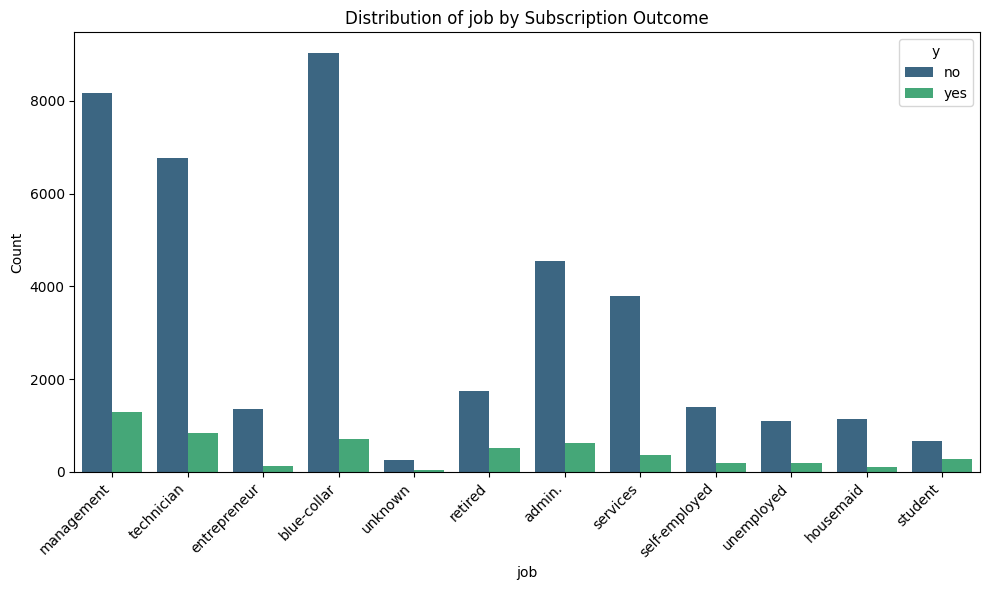

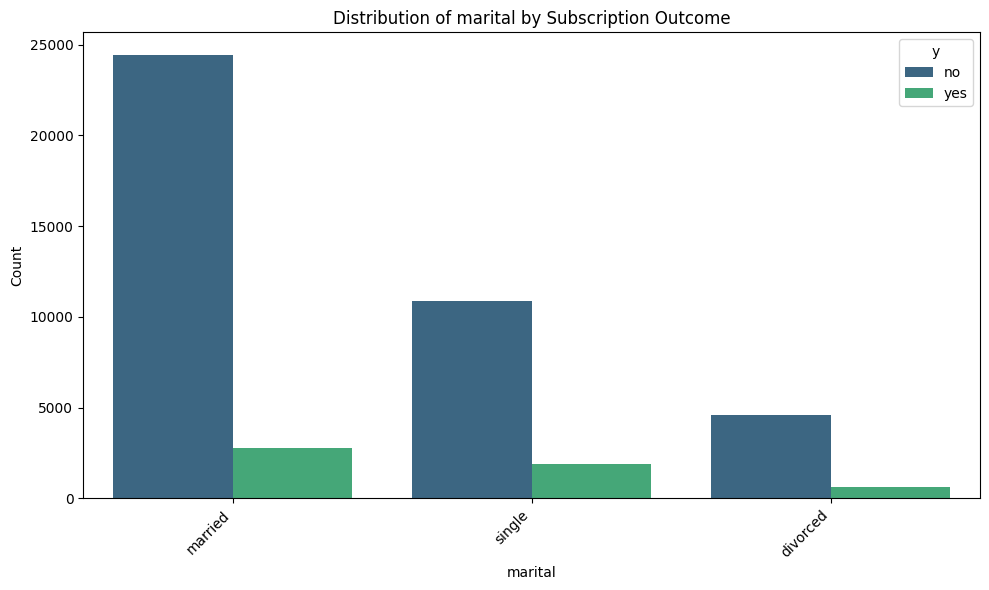

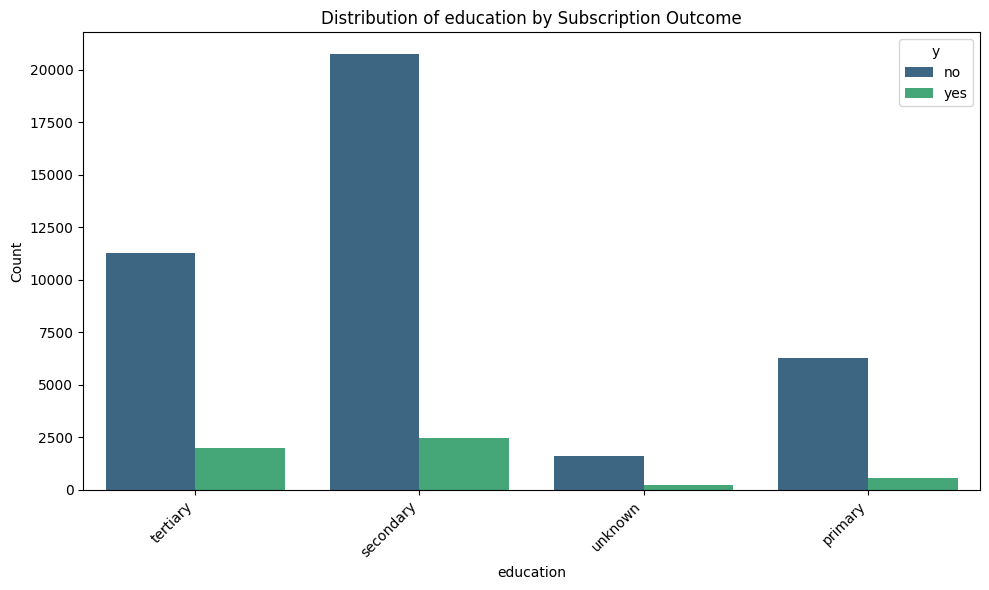

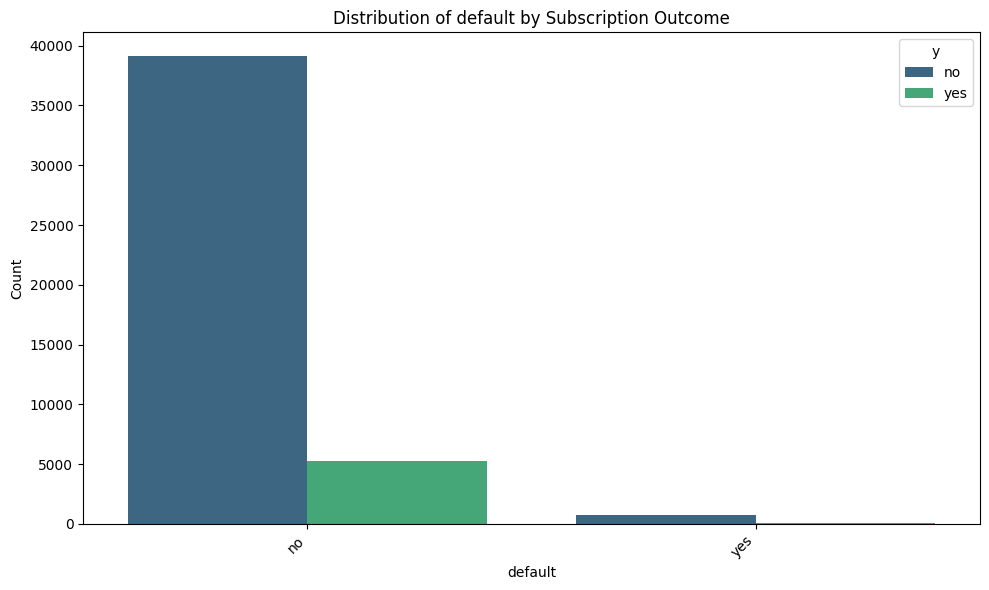

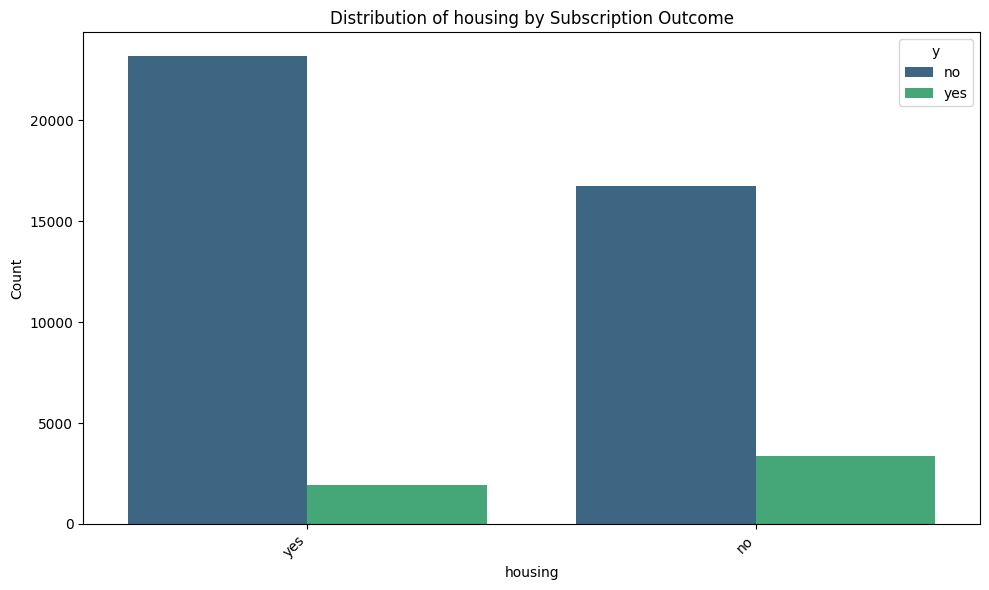

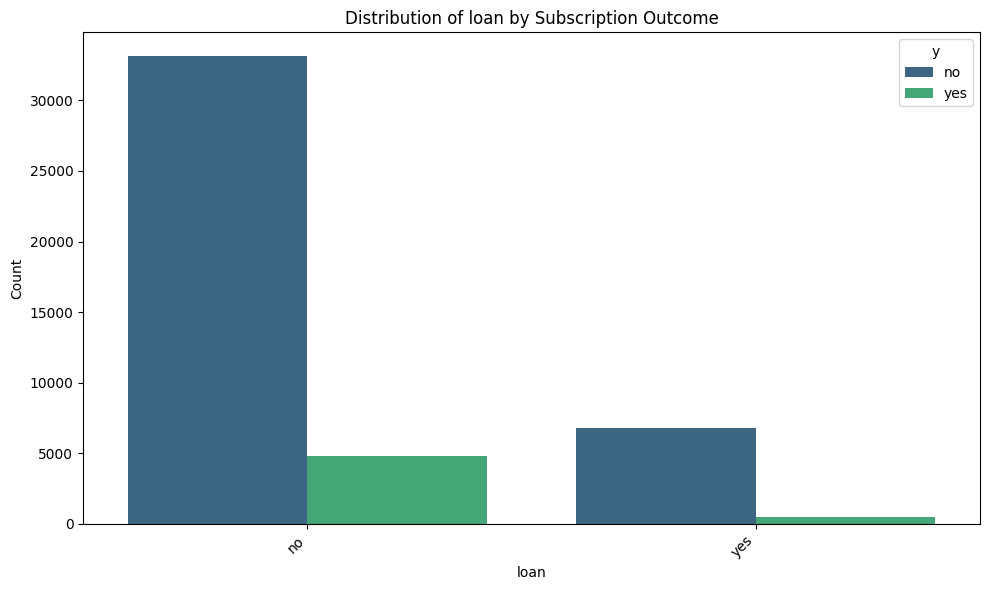

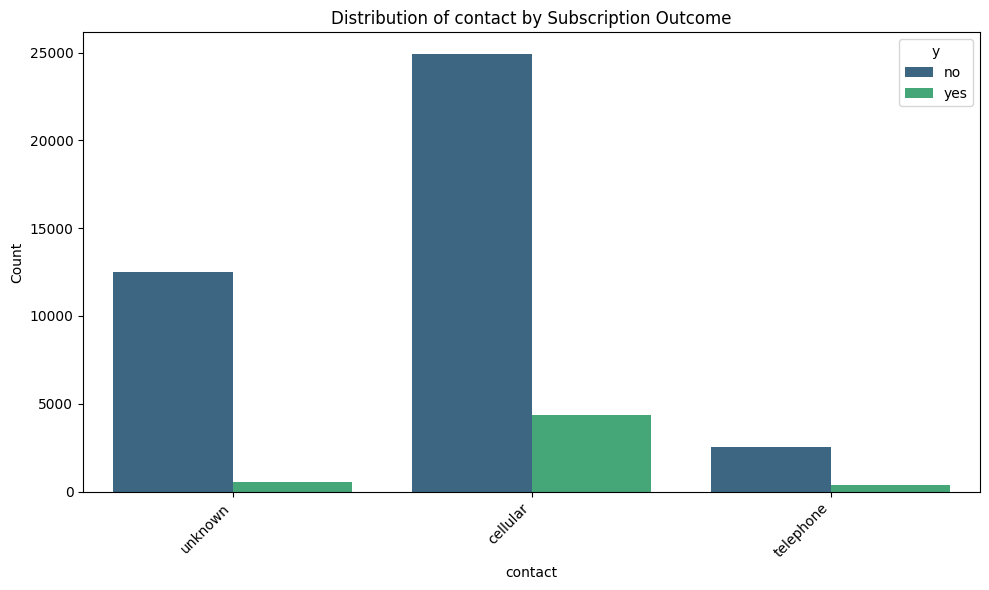

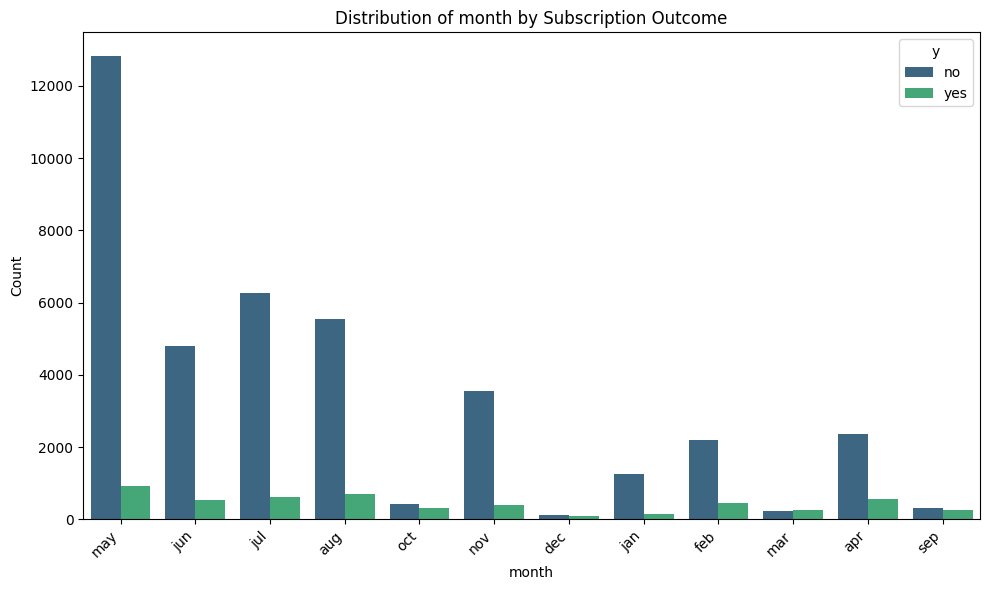

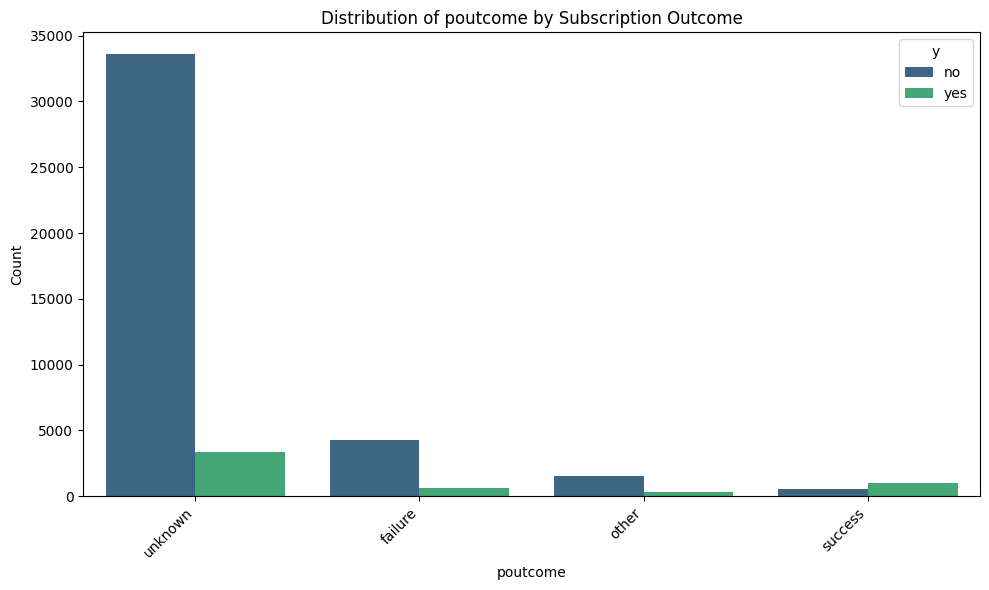

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Exclude the target variable 'y' from the categorical columns to plot as a feature
categorical_features = [col for col in categorical_cols if col != 'y']

# Plot bar charts for each categorical feature
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='y', palette='viridis')
    plt.title(f'Distribution of {col} by Subscription Outcome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout()
    plt.show()

## Distribution of Numerical Features

### Subtask:
Generate histograms for numerical features in 'df' to understand their distributions, potentially overlaying or separating by the 'y' target variable to observe differences.


**Reasoning**:
To visualize the distribution of numerical features and their relationship with the target variable 'y', I will identify numerical columns, then iterate through them to create histograms using seaborn's histplot function, differentiating by the 'y' target variable.



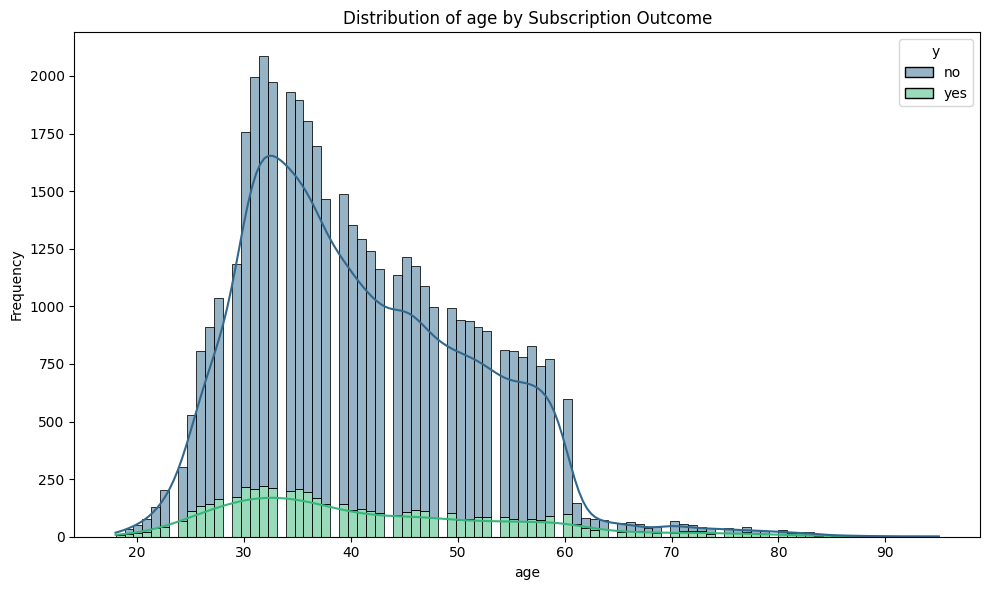

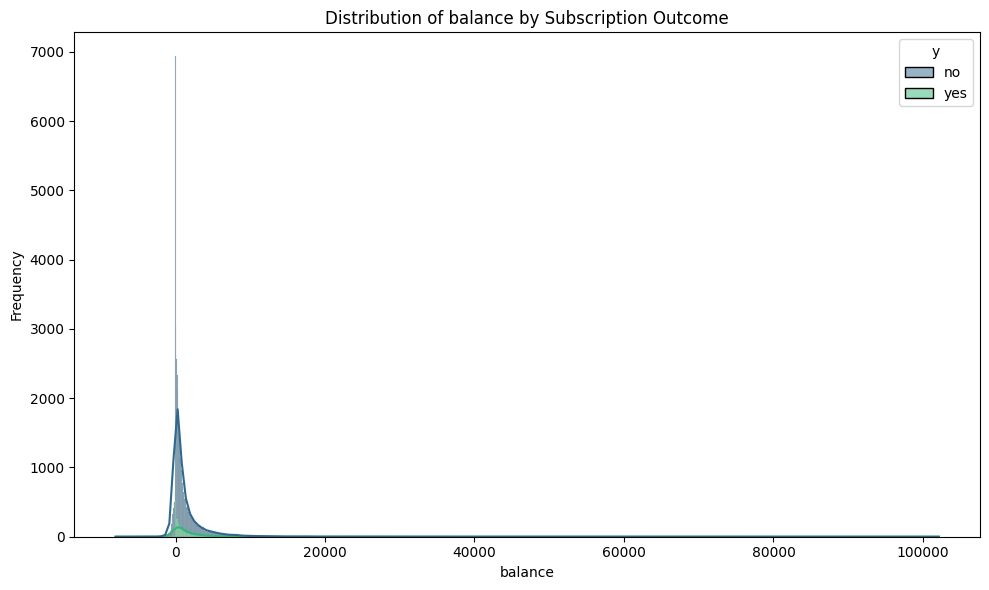

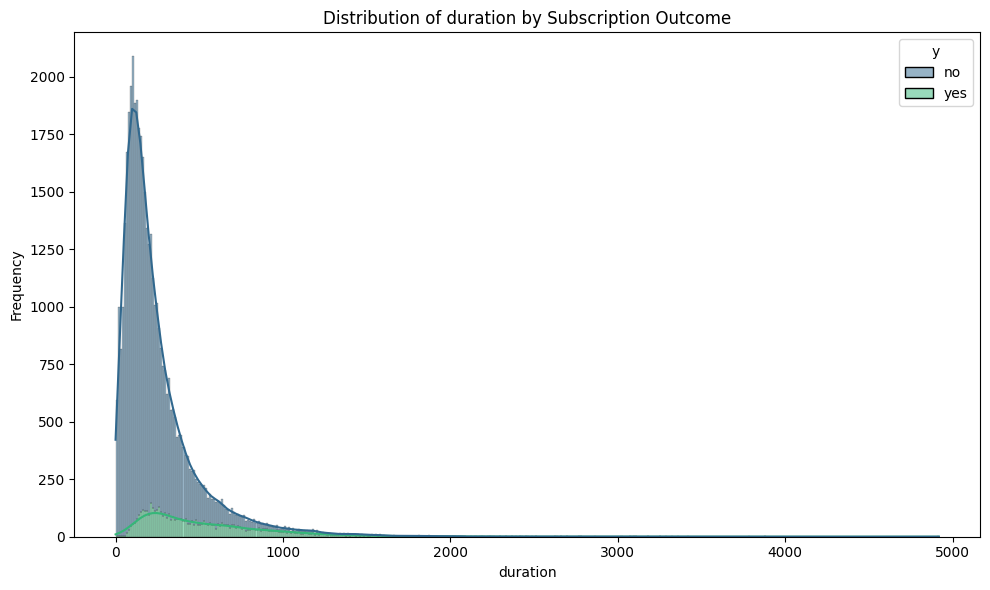

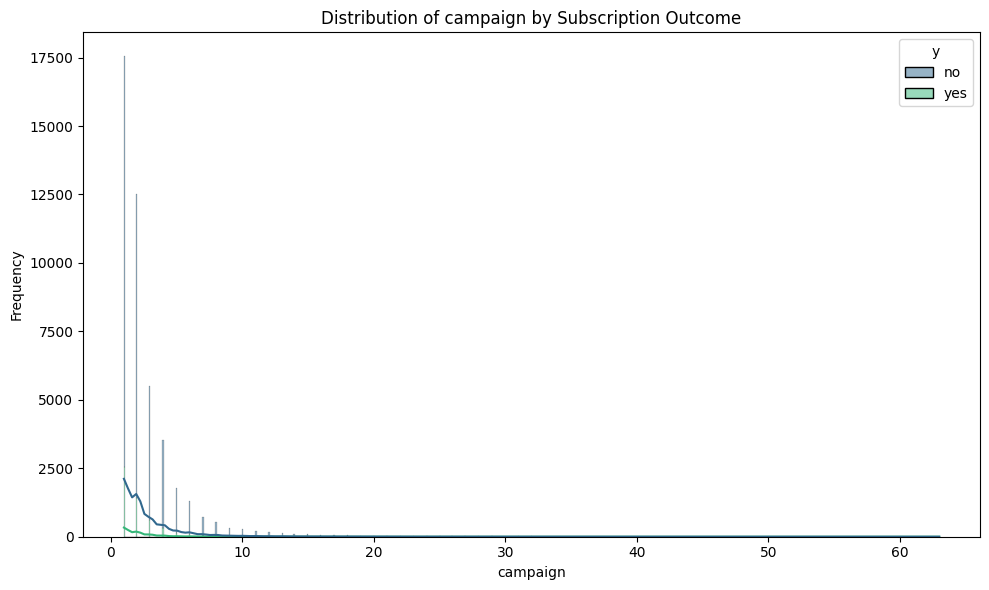

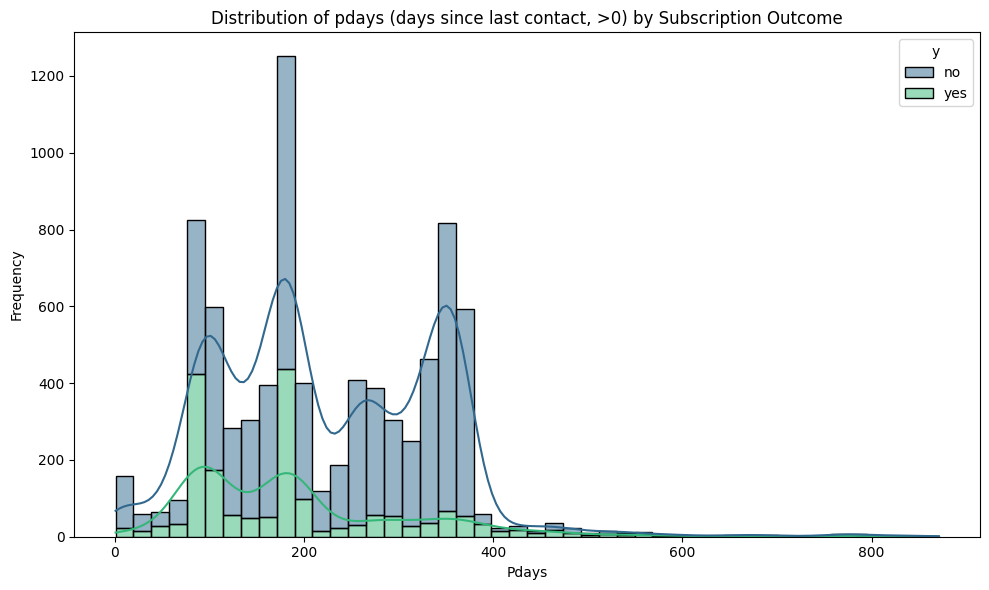

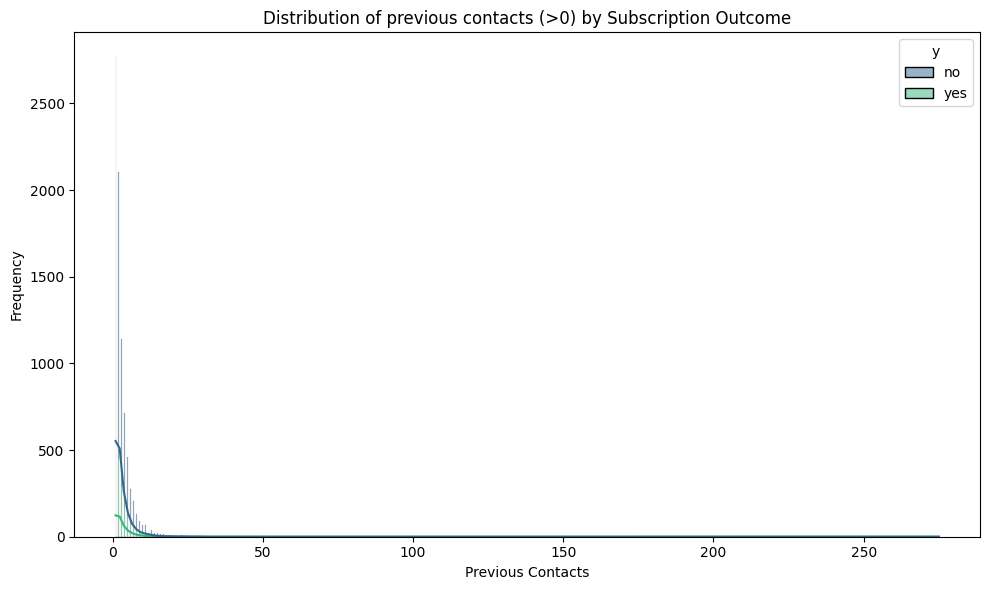

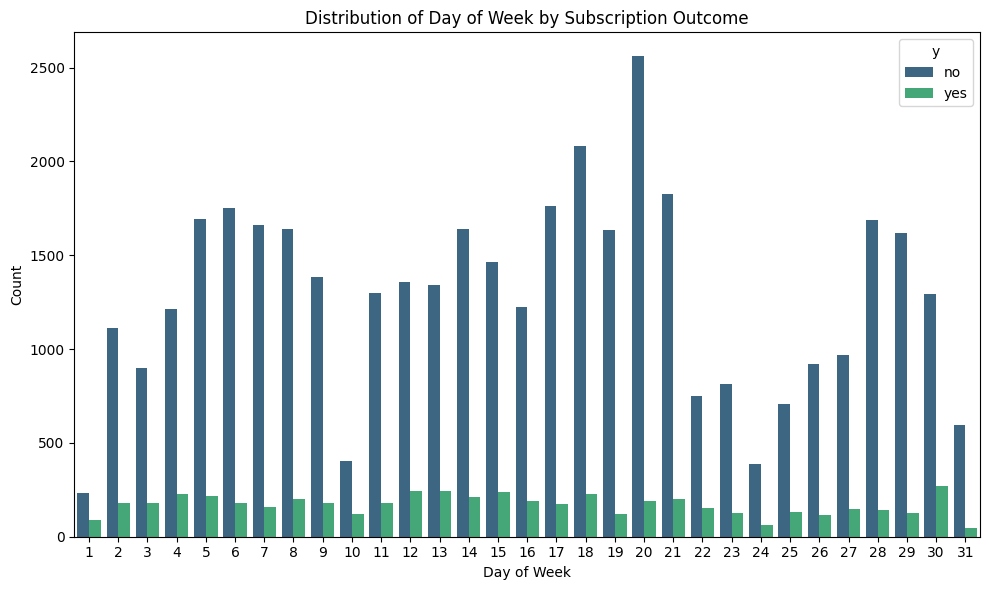

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'day_of_week' from direct histogram plotting with hue='y' as it might clutter the plot, and also 'pdays' and 'previous' often have specific behaviors.
# We can plot 'day_of_week' separately if needed, or with bins.
# For 'pdays', -1 means 'not previously contacted', which is a significant category and can be treated separately or binned.
# 'previous' also has many zeros.
# Let's focus on 'age', 'balance', 'duration', 'campaign' for direct hue plotting first.

# Filter out columns that are not suitable for direct hue plotting or require special handling
# and remove 'day_of_week' as it's more categorical in nature for this context
numerical_features_to_plot = [col for col in numerical_cols if col not in ['day_of_week', 'pdays', 'previous']]

for col in numerical_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='y', kde=True, palette='viridis', multiple='stack')
    plt.title(f'Distribution of {col} by Subscription Outcome')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Special handling for 'pdays' and 'previous' due to their distribution (many -1 or 0 values)
# For 'pdays', convert -1 to a separate category or simply filter for positive values to see distribution of actual days.
plt.figure(figsize=(10, 6))
# Filtering pdays > 0 to see distribution of actual days passed since last contact
sns.histplot(data=df[df['pdays'] > 0], x='pdays', hue='y', kde=True, palette='viridis', multiple='stack')
plt.title('Distribution of pdays (days since last contact, >0) by Subscription Outcome')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
# Filtering previous > 0 to see distribution of actual previous contacts
sns.histplot(data=df[df['previous'] > 0], x='previous', hue='y', kde=True, palette='viridis', multiple='stack')
plt.title('Distribution of previous contacts (>0) by Subscription Outcome')
plt.xlabel('Previous Contacts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# For 'day_of_week', which is numeric but acts like a category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='y', palette='viridis')
plt.title('Distribution of Day of Week by Subscription Outcome')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Feature Impact on Target Variable

### Subtask:
Utilize stacked bar charts or grouped bar charts for categorical features and box plots or violin plots for numerical features, showing their direct relationship and impact on the 'y' (term deposit subscription) outcome.


## Summary:

### Data Analysis Key Findings

*   **Categorical Features:** Bar charts with `hue='y'` effectively displayed the distribution of each category while showing the proportion of 'yes'/'no' subscriptions within them.
*   **Numerical Features - General:** Histograms with `hue='y'` and `multiple='stack'` were used to visualize the distribution of `age`, `balance`, `duration`, and `campaign` in relation to the subscription outcome.
*   **Numerical Features - Specific Handling:**
    *   `pdays` (days since last contact) and `previous` (number of previous contacts) were specially handled due to many zero or -1 values. Histograms were generated for values greater than 0 to better understand actual contact history.
    *   `day_of_week`, despite being numerical, was treated as a categorical feature, and its distribution against the target `y` was visualized using a countplot.

### Insights or Next Steps

*   The distinct distributions of 'yes' and 'no' subscribers across various features, especially `duration` and certain categories of other features, suggest these features are highly influential for predicting term deposit subscriptions and should be prioritized in model building.
*   Further investigation into the `pdays` and `previous` features, potentially by creating binary indicators for 'contacted' vs. 'not contacted' or transforming their distributions, could yield more predictive power for the model.
